In [1]:
library(tidyverse)
library(ggplot2)
library(DESeq2)
library(RColorBrewer)
library(biomaRt)
library(ggpubr)
library(smplot2)
library(pheatmap)

── Attaching core tidyverse packages ──────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The followin

In [2]:
fc_125 <- read.delim(file = '../KRAB-ZFP_Analysis/e12.clean.rc.csv', sep = ",", header = T)
fc_125 <- fc_125[,c(1,7:21)]
fc_125_female <- fc_125[,c(1,2:5,6:9)]
fc_125_male <- fc_125[,c(1,10:16)]

Warning message in file(file, "rt"):
“cannot open file '../KRAB-ZFP_Analysis/e12.clean.rc.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [3]:
males <- column_to_rownames(fc_125_male, "Geneid")
females <- column_to_rownames(fc_125_female, "Geneid")
males <- as.matrix(males)
males
females <- as.matrix(females)
females

,MCT1,MCT2,MCT3,MCT4,MKO1,MKO2,MKO4
ENSMUSG00000051285,9686,10075,11433,12997,20323,20521,20089
ENSMUSG00000026312,2,6,0,16,4,0,0
ENSMUSG00000039748,10710,9538,13843,12899,6462,7133,9115
ENSMUSG00000104158,16,20,6,8,0,0,0
ENSMUSG00000057363,4546,4263,4076,4757,4488,3962,8422
ENSMUSG00000047216,18,6,2,8,58,84,104
ENSMUSG00000038702,194,252,212,192,230,324,604
ENSMUSG00000033021,1280,886,1718,1541,1472,964,3680
ENSMUSG00000055214,43,54,24,25,236,14,18
ENSMUSG00000033007,32,10,13,2,3,0,6


,FCT1,FCT2,FCT3,FCT4,FKO1,FKO2,FKO3,FKO4
ENSMUSG00000051285,7013,9048,7762,9010,7289,9405,8982,12713
ENSMUSG00000026312,20,0,13,10,86,0,0,45
ENSMUSG00000039748,5014,4177,5373,6828,2876,2729,3504,5431
ENSMUSG00000104158,0,0,0,5,0,0,0,0
ENSMUSG00000057363,3548,2657,3254,3194,2088,1846,3337,4032
ENSMUSG00000047216,4,2,4,6,83,23,30,72
ENSMUSG00000038702,270,274,230,224,326,96,111,614
ENSMUSG00000033021,450,734,584,654,1500,558,1096,790
ENSMUSG00000055214,14,14,39,72,10,4,10,22
ENSMUSG00000033007,42,0,11,0,10,2,0,158


In [4]:
Con_Males <- factor(c(rep("Control",4), rep("TCKO",3)))
Con_Females <- factor(c(rep("Control",4), rep("TCKO",4)))
#
M_coldata <- data.frame(row.names=colnames(males), Con_Males)
F_coldata <- data.frame(row.names=colnames(females), Con_Females)
M_coldata
F_coldata

,Con_Males
,<fct>
MCT1,Control
MCT2,Control
MCT3,Control
MCT4,Control
MKO1,TCKO
MKO2,TCKO
MKO4,TCKO


,Con_Females
,<fct>
FCT1,Control
FCT2,Control
FCT3,Control
FCT4,Control
FKO1,TCKO
FKO2,TCKO
FKO3,TCKO
FKO4,TCKO


In [5]:
dds_males <- DESeqDataSetFromMatrix(countData=males, colData=M_coldata, design=~Con_Males)
ddsrun_males <- DESeq(dds_males)
#
dds_females <- DESeqDataSetFromMatrix(countData=females, colData=F_coldata, design=~Con_Females)
ddsrun_females <- DESeq(dds_females)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [8]:
rld_Males <- rlogTransformation(ddsrun_males)
rld_Females <- rlogTransformation(ddsrun_females)

In [9]:
#saveRDS(ddsrun_males, file = 'E125_Male_DEG.rds')
#saveRDS(ddsrun_females, file = 'E125_Female_DEG.rds')
#
#saveRDS(rld_Males, file = 'E125_Male_rld_DEG.rds')
#saveRDS(rld_Females, file = 'E125_Female_rld_DEG.rds')

In [3]:
ddsrun_males <- readRDS(file = 'E125_Male_DEG.rds')
ddsrun_females <- readRDS(file = 'E125_Female_DEG.rds')
rld_Males <- readRDS(file = 'E125_Male_rld_DEG.rds')
rld_Females <- readRDS(file = 'E125_Female_rld_DEG.rds')

In [4]:
##
Male_DE <- results(ddsrun_males, contrast = c('Con_Males', 'TCKO', 'Control'))
Male_DE <- Male_DE[order(Male_DE$padj), ]
Male_DE
#
Female_DE <- results(ddsrun_females, contrast = c("Con_Females", "TCKO", "Control"))
Female_DE <- Female_DE[order(Female_DE$padj), ]
Female_DE

log2 fold change (MLE): Con_Males TCKO vs Control 
Wald test p-value: Con Males TCKO vs Control 
DataFrame with 18809 rows and 6 columns
                     baseMean log2FoldChange     lfcSE      stat       pvalue
                    <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSMUSG00000036292   2448.986        4.96913  0.168576   29.4771 5.65896e-191
ENSMUSG00000005566  14651.225       -3.41069  0.156285  -21.8235 1.38797e-105
ENSMUSG00000010592  13548.534       -4.00873  0.187309  -21.4017 1.28756e-101
ENSMUSG00000025165   1016.254        5.91634  0.283044   20.9025  5.07792e-97
ENSMUSG00000035606    885.175        6.02555  0.303184   19.8742  6.80290e-88
...                       ...            ...       ...       ...          ...
ENSMUSG00000118124 340.831282       1.144805   0.81839  1.398849           NA
ENSMUSG00000036908  25.444287       1.599899   1.35271  1.182735           NA
ENSMUSG00000025204   0.319831       2.072176   3.76293  0.550682     0.581852
ENSMU

log2 fold change (MLE): Con_Females TCKO vs Control 
Wald test p-value: Con Females TCKO vs Control 
DataFrame with 18809 rows and 6 columns
                    baseMean log2FoldChange     lfcSE       stat      pvalue
                   <numeric>      <numeric> <numeric>  <numeric>   <numeric>
ENSMUSG00000036292  1066.404        4.87611  0.266717    18.2820 1.15180e-74
ENSMUSG00000009292   637.239        5.94793  0.335868    17.7091 3.56474e-70
ENSMUSG00000031981   776.184        5.99149  0.344232    17.4054 7.51177e-68
ENSMUSG00000034839   369.671        5.65372  0.325733    17.3569 1.74886e-67
ENSMUSG00000091813   388.569        6.16753  0.367612    16.7773 3.57740e-63
...                      ...            ...       ...        ...         ...
ENSMUSG00000050195  3.785762      -0.102512   2.35262 -0.0435735    0.965244
ENSMUSG00000025204  0.185801       1.428189   3.52659  0.4049770    0.685494
ENSMUSG00000024673  0.000000             NA        NA         NA          NA
ENSMUSG00000

In [5]:
M_DE_Table <- merge(as.data.frame(Male_DE), as.data.frame(assay(rld_Males)), by="row.names", sort=FALSE)
names(M_DE_Table)[1] <- "Gene"
(M_DE_Table)
#
F_DE_Table <- merge(as.data.frame(Female_DE), as.data.frame(assay(rld_Females)), by="row.names", sort=FALSE)
names(F_DE_Table)[1] <- "Gene"
(F_DE_Table)

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,MCT1,MCT2,MCT3,MCT4,MKO1,MKO2,MKO4
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000036292,2448.9861,4.969126,0.1685758,29.47711,5.658962e-191,9.055471e-187,8.404494,8.552706,8.425130,8.372806,11.676515,11.618593,11.796821
ENSMUSG00000005566,14651.2251,-3.410692,0.1562852,-21.82351,1.387972e-105,1.110517e-101,14.195882,14.033032,14.317844,14.178287,11.685362,11.891578,11.882105
ENSMUSG00000010592,13548.5338,-4.008727,0.1873086,-21.40172,1.287565e-101,6.867871e-98,13.936915,14.132865,14.156855,13.963556,11.073867,11.407619,11.391335
ENSMUSG00000025165,1016.2544,5.916339,0.2830441,20.90253,5.077918e-97,2.031421e-93,6.810421,7.026444,6.915638,6.987021,9.997836,10.468803,10.290285
ENSMUSG00000035606,885.1754,6.025550,0.3031841,19.87422,6.802903e-88,2.177201e-84,6.622046,6.859048,6.842940,6.769215,9.818293,10.044631,10.231236
ENSMUSG00000009292,1110.2408,5.595341,0.2908614,19.23714,1.809282e-82,4.825355e-79,7.093804,7.238764,7.070292,7.295477,10.068711,10.596409,10.547473
ENSMUSG00000039853,1885.7771,4.625888,0.2458273,18.81763,5.414943e-79,1.237856e-75,8.315910,8.537744,8.158236,8.336470,11.145509,11.546025,11.223400
ENSMUSG00000022181,1170.9033,5.629040,0.3080540,18.27290,1.360171e-74,2.720683e-71,7.120375,7.438848,7.050455,7.192325,10.442803,10.291555,10.745374
ENSMUSG00000018924,2369.8663,5.354463,0.2970680,18.02436,1.254444e-72,2.230401e-69,7.780893,8.308592,8.241823,8.100635,11.469803,11.877880,11.453307


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,FCT1,FCT2,FCT3,FCT4,FKO1,FKO2,FKO3,FKO4
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000036292,1066.4042,4.876106,0.2667166,18.28197,1.151805e-74,1.709739e-70,7.349174,7.208882,7.591739,7.233747,10.156671,10.445805,10.389787,10.452078
ENSMUSG00000009292,637.2390,5.947928,0.3358677,17.70914,3.564739e-70,2.645749e-66,6.531987,6.367064,6.352139,6.369477,9.155860,9.338087,9.628003,9.757833
ENSMUSG00000031981,776.1839,5.991493,0.3442324,17.40537,7.511770e-68,3.716824e-64,6.579221,6.481262,6.406248,6.501963,9.916944,9.581541,9.356766,10.168043
ENSMUSG00000034839,369.6712,5.653718,0.3257330,17.35691,1.748863e-67,6.490029e-64,6.262088,6.246755,6.245485,6.322216,8.686058,8.739613,8.653387,8.559608
ENSMUSG00000091813,388.5686,6.167530,0.3676116,16.77730,3.577401e-63,1.062059e-59,6.162953,6.218496,6.117999,6.093819,8.604341,8.686628,8.593296,8.940611
ENSMUSG00000034416,1280.1992,5.236813,0.3135846,16.69984,1.314059e-62,3.250982e-59,7.168387,7.453565,7.006562,7.538740,10.583680,10.870327,10.466539,10.544299
ENSMUSG00000022197,2121.5755,3.570086,0.2182774,16.35573,3.959430e-60,8.396253e-57,9.286359,8.793583,8.901403,9.032385,11.460632,11.476590,11.480982,11.519009
ENSMUSG00000092232,1161.6681,4.153420,0.2562158,16.21063,4.241782e-59,7.870627e-56,7.838695,7.768889,8.016748,7.922981,10.766378,10.556008,10.156659,10.592780
ENSMUSG00000010592,6615.8203,-4.804336,0.2994623,-16.04321,6.377516e-58,1.051865e-54,13.695380,12.677364,12.817179,13.022050,9.832824,9.442658,9.562649,9.612461


In [6]:
#use biomaRt to convert the Ensembl IDs that featurecounts used to Gene names. The alignment was done using mm39, so we will use db version 109, which is the same annotation as our GTF.
ensembl <- useEnsembl(biomart = 'genes', dataset = 'mmusculus_gene_ensembl', version = 109)
ensembl
#
annotLookup <- getBM(mart = ensembl, attributes = c('ensembl_gene_id','gene_biotype','external_gene_name'), uniqueRows = TRUE)
df <- c(1,3)
annotLookup_gene <- annotLookup[,df]
annotLookup_gene

Object of class 'Mart':
  Using the ENSEMBL_MART_ENSEMBL BioMart database
  Using the mmusculus_gene_ensembl dataset

ensembl_gene_id,external_gene_name
<chr>,<chr>
ENSMUSG00000064336,mt-Tf
ENSMUSG00000064337,mt-Rnr1
ENSMUSG00000064338,mt-Tv
ENSMUSG00000064339,mt-Rnr2
ENSMUSG00000064340,mt-Tl1
ENSMUSG00000064341,mt-Nd1
ENSMUSG00000064342,mt-Ti
ENSMUSG00000064343,mt-Tq
ENSMUSG00000064344,mt-Tm


In [7]:
male_merge <- inner_join(M_DE_Table, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
cols <- c(1,15,2:14)
male_merge <- male_merge[,cols]
male_merge
#
female_merge <- inner_join(F_DE_Table, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
cols <- c(1,16,2:15)
female_merge <- female_merge[,cols]
female_merge

Gene,external_gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,MCT1,MCT2,MCT3,MCT4,MKO1,MKO2,MKO4
<I<chr>>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000036292,Gramd1c,2448.9861,4.969126,0.1685758,29.47711,5.658962e-191,9.055471e-187,8.404494,8.552706,8.425130,8.372806,11.676515,11.618593,11.796821
ENSMUSG00000005566,Trim28,14651.2251,-3.410692,0.1562852,-21.82351,1.387972e-105,1.110517e-101,14.195882,14.033032,14.317844,14.178287,11.685362,11.891578,11.882105
ENSMUSG00000010592,Dazl,13548.5338,-4.008727,0.1873086,-21.40172,1.287565e-101,6.867871e-98,13.936915,14.132865,14.156855,13.963556,11.073867,11.407619,11.391335
ENSMUSG00000025165,Sectm1a,1016.2544,5.916339,0.2830441,20.90253,5.077918e-97,2.031421e-93,6.810421,7.026444,6.915638,6.987021,9.997836,10.468803,10.290285
ENSMUSG00000035606,Ky,885.1754,6.025550,0.3031841,19.87422,6.802903e-88,2.177201e-84,6.622046,6.859048,6.842940,6.769215,9.818293,10.044631,10.231236
ENSMUSG00000009292,Trpm2,1110.2408,5.595341,0.2908614,19.23714,1.809282e-82,4.825355e-79,7.093804,7.238764,7.070292,7.295477,10.068711,10.596409,10.547473
ENSMUSG00000039853,Trim14,1885.7771,4.625888,0.2458273,18.81763,5.414943e-79,1.237856e-75,8.315910,8.537744,8.158236,8.336470,11.145509,11.546025,11.223400
ENSMUSG00000022181,C6,1170.9033,5.629040,0.3080540,18.27290,1.360171e-74,2.720683e-71,7.120375,7.438848,7.050455,7.192325,10.442803,10.291555,10.745374
ENSMUSG00000018924,Alox15,2369.8663,5.354463,0.2970680,18.02436,1.254444e-72,2.230401e-69,7.780893,8.308592,8.241823,8.100635,11.469803,11.877880,11.453307


Gene,external_gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,FCT1,FCT2,FCT3,FCT4,FKO1,FKO2,FKO3,FKO4
<I<chr>>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000036292,Gramd1c,1066.4042,4.876106,0.2667166,18.28197,1.151805e-74,1.709739e-70,7.349174,7.208882,7.591739,7.233747,10.156671,10.445805,10.389787,10.452078
ENSMUSG00000009292,Trpm2,637.2390,5.947928,0.3358677,17.70914,3.564739e-70,2.645749e-66,6.531987,6.367064,6.352139,6.369477,9.155860,9.338087,9.628003,9.757833
ENSMUSG00000031981,Capn9,776.1839,5.991493,0.3442324,17.40537,7.511770e-68,3.716824e-64,6.579221,6.481262,6.406248,6.501963,9.916944,9.581541,9.356766,10.168043
ENSMUSG00000034839,Larp6,369.6712,5.653718,0.3257330,17.35691,1.748863e-67,6.490029e-64,6.262088,6.246755,6.245485,6.322216,8.686058,8.739613,8.653387,8.559608
ENSMUSG00000091813,Ces2h,388.5686,6.167530,0.3676116,16.77730,3.577401e-63,1.062059e-59,6.162953,6.218496,6.117999,6.093819,8.604341,8.686628,8.593296,8.940611
ENSMUSG00000034416,Pkd1l2,1280.1992,5.236813,0.3135846,16.69984,1.314059e-62,3.250982e-59,7.168387,7.453565,7.006562,7.538740,10.583680,10.870327,10.466539,10.544299
ENSMUSG00000022197,Pdzd2,2121.5755,3.570086,0.2182774,16.35573,3.959430e-60,8.396253e-57,9.286359,8.793583,8.901403,9.032385,11.460632,11.476590,11.480982,11.519009
ENSMUSG00000092232,Gm20521,1161.6681,4.153420,0.2562158,16.21063,4.241782e-59,7.870627e-56,7.838695,7.768889,8.016748,7.922981,10.766378,10.556008,10.156659,10.592780
ENSMUSG00000010592,Dazl,6615.8203,-4.804336,0.2994623,-16.04321,6.377516e-58,1.051865e-54,13.695380,12.677364,12.817179,13.022050,9.832824,9.442658,9.562649,9.612461


In [ ]:
#Import Wolf's Data
cols <- c("GeneID", "External_Name", "2C_2FC")
ZGA_list <- read.delim(file = '2c_l2fc.tsv', header = T, sep = '\t')
colnames(ZGA_list) <- cols
ZGA_list <- left_join(ZGA_list, annotLookup_gene, by = c("GeneID" = "ensembl_gene_id"))
ZGA_list

In [9]:
male_2C <- right_join(male_merge, ZGA_list, by = c("Gene" = "GeneID"))
male_2C <- male_2C %>% mutate(Sig = (case_when(padj <= 0.05 ~ 'Y',TRUE ~ 'N')))
male_2C <- male_2C[,c(1,2,4,17,20)]
male_2C <- na.omit(male_2C)
male_2C
#
female_2C <- right_join(female_merge, ZGA_list, by = c("Gene" = "GeneID"))
female_2C <- female_2C %>% mutate(Sig = (case_when(padj <= 0.05 ~ 'Y',TRUE ~ 'N')))
female_2C <- female_2C[,c(1,2,4,18,21)]
female_2C <- na.omit(female_2C)
female_2C

,Gene,external_gene_name.x,log2FoldChange,JD_2FC,Sig
,<I<chr>>,<chr>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000010592,Dazl,-4.0087275,3.6012127,Y
2,ENSMUSG00000075610,Tmem92,5.5840738,9.0713506,Y
3,ENSMUSG00000070619,Pramel31,5.8875931,8.5701754,Y
4,ENSMUSG00000019952,Poc1b,1.4446485,-0.8755984,Y
5,ENSMUSG00000052477,C130026I21Rik,1.8573664,5.5978027,Y
6,ENSMUSG00000096284,Tcstv1,5.5730995,8.1042085,Y
7,ENSMUSG00000096323,Gm20767,4.4721323,9.3024037,Y
8,ENSMUSG00000045519,Zfp560,1.4356648,4.0911667,Y
9,ENSMUSG00000095936,Zscan4e,5.4067154,9.0430443,Y


,Gene,external_gene_name.x,log2FoldChange,JD_2FC,Sig
,<I<chr>>,<chr>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000010592,Dazl,-4.804336,3.6012127,Y
2,ENSMUSG00000070619,Pramel31,6.562480,8.5701754,Y
3,ENSMUSG00000070890,Pramel19,6.895034,10.2830186,Y
4,ENSMUSG00000075610,Tmem92,7.188096,9.0713506,Y
5,ENSMUSG00000096175,Gm21761,7.647614,9.5191770,Y
6,ENSMUSG00000070618,Pramel20,6.012090,9.6945823,Y
7,ENSMUSG00000093847,Eif1ad15,4.837801,9.0640852,Y
8,ENSMUSG00000095936,Zscan4e,7.098040,9.0430443,Y
9,ENSMUSG00000037028,Pramel18,6.356269,8.4782843,Y


In [10]:
write.table(male_2C, file = 'male_2c_e125_supplement.tsv', col.names = T, row.names = F, quote = F, sep = '\t')
write.table(female_2C, file = 'female_2c_e125_supplement.tsv', col.names = T, row.names = F, quote = F, sep = '\t')

Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: colour.


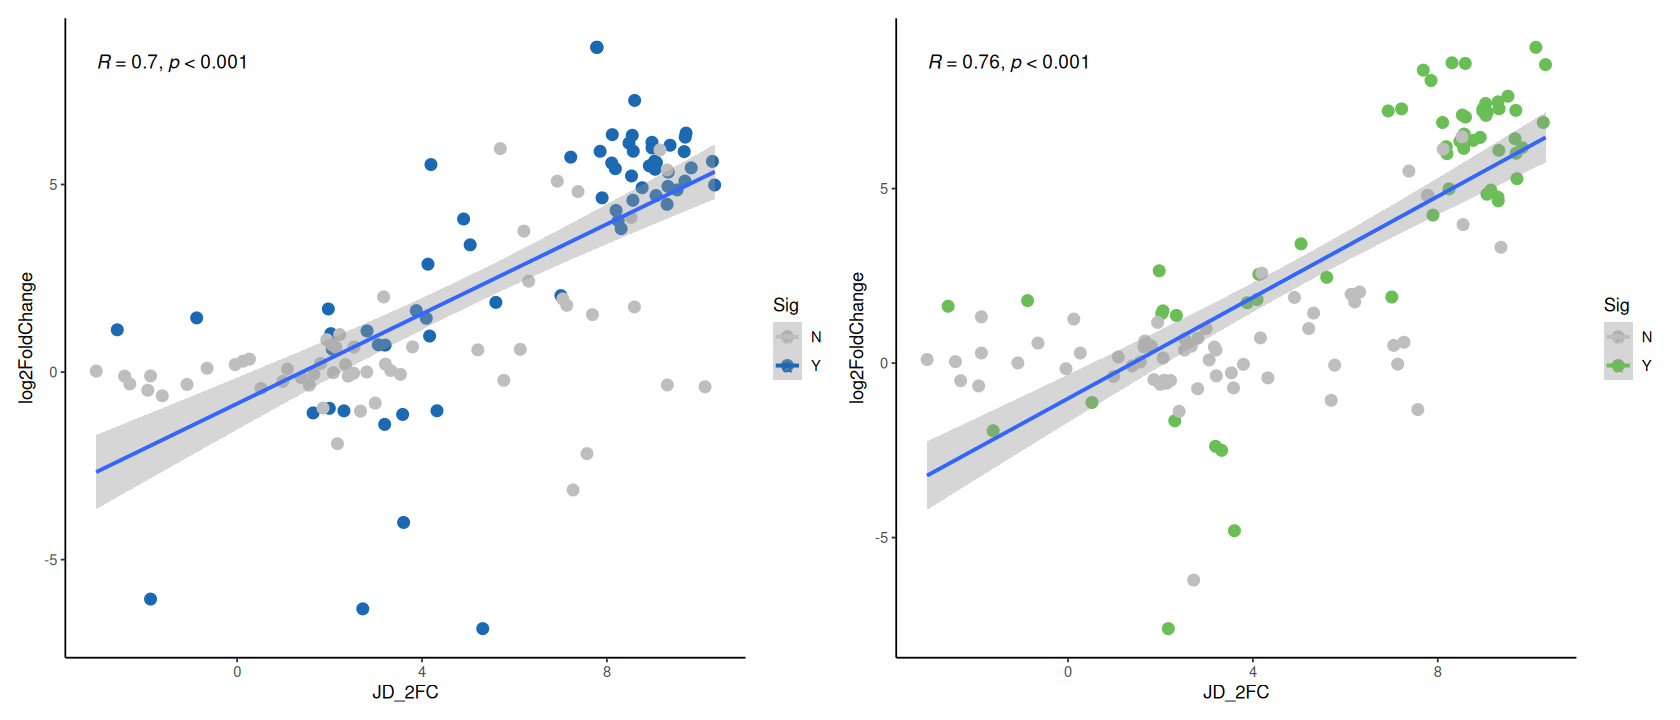

In [11]:
options(repr.plot.height = 6, repr.plot.width = 14)
#
p1 <- ggplot(male_2C, aes(x=JD_2FC, y =log2FoldChange, color = Sig, group = 1)) + geom_point(size = 3) + geom_smooth(method='lm', formula= y~x) + sm_statCorr(corr_method = "pearson") + theme_classic() + 
scale_color_manual(values = c("Y" = "#1B69B3", "N" = "grey"))
p2 <- ggplot(female_2C, aes(x=JD_2FC, y =log2FoldChange, color = Sig, group = 1)) + geom_point(size = 3) + geom_smooth(method='lm', formula= y~x) + sm_statCorr(corr_method = "pearson") + theme_classic() +
scale_color_manual(values = c("Y" = "#6ABE56", "N" = "grey"))
p1+p2
#
#pdf(file = 'E125_2C_Reik_L2FC_JD_Reanalysis.pdf', height = 6, width = 14)
#p1+p2
#dev.off()

In [17]:
#find pearson R
table(male_2C$Sig == "Y")
table(female_2C$Sig == "Y")


FALSE  TRUE 
   56    65 


FALSE  TRUE 
   63    58 

In [29]:
fc_135 <- read.delim(file = '../KRAB-ZFP_Analysis/e13.clean.rc.csv', sep = ",", header = T)
fc_135 <- fc_135[,c(1,7:19)]
fc_135_female <- fc_135[,c(1,5:7,2:4)]
fc_135_male <- fc_135[,c(1,12:14,8:11)]

In [30]:
males <- column_to_rownames(fc_135_male, "Geneid")
females <- column_to_rownames(fc_135_female, "Geneid")
males <- as.matrix(males)
males
females <- as.matrix(females)
females

,MCTO1,MCTO2,MCTO3,MCKO1,MCKO3,MCKO4,MCKO5
ENSMUSG00000051285,4078,6418,2935,9443,3192,2890,9581
ENSMUSG00000026312,20,82,6,8,0,2,2
ENSMUSG00000039748,4814,7607,5862,4843,2349,2253,4265
ENSMUSG00000104158,0,10,0,10,0,0,2
ENSMUSG00000057363,1472,2643,1829,1996,1062,919,2133
ENSMUSG00000047216,0,8,2,123,234,22,125
ENSMUSG00000038702,134,176,196,190,64,88,234
ENSMUSG00000033021,942,1292,1134,1024,688,692,996
ENSMUSG00000055214,16,13,10,12,6,13,4
ENSMUSG00000033007,0,2,0,8,2,0,14


,FCTO1,FCTO2,FCTO3,FCKO1,FCKO2,FCKO3
ENSMUSG00000051285,7353,4982,4885,11422,6376,5869
ENSMUSG00000026312,4,2,40,3,0,4
ENSMUSG00000039748,16914,9950,14100,10202,5666,9321
ENSMUSG00000104158,8,8,32,194,0,22
ENSMUSG00000057363,4593,3757,4009,7036,3119,2995
ENSMUSG00000047216,4,4,4,60,43,119
ENSMUSG00000038702,759,772,1414,460,314,246
ENSMUSG00000033021,2174,2248,3038,2166,1720,1822
ENSMUSG00000055214,68,20,34,118,42,8
ENSMUSG00000033007,0,4,6,2,8,0


In [31]:
Con_Males <- factor(c(rep("Control",3), rep("TCKO",4)))
Con_Females <- factor(c(rep("Control",3), rep("TCKO",3)))
#
M_coldata <- data.frame(row.names=colnames(males), Con_Males)
F_coldata <- data.frame(row.names=colnames(females), Con_Females)
M_coldata
F_coldata

,Con_Males
,<fct>
MCTO1,Control
MCTO2,Control
MCTO3,Control
MCKO1,TCKO
MCKO3,TCKO
MCKO4,TCKO
MCKO5,TCKO


,Con_Females
,<fct>
FCTO1,Control
FCTO2,Control
FCTO3,Control
FCKO1,TCKO
FCKO2,TCKO
FCKO3,TCKO


In [32]:
dds_males_E135 <- DESeqDataSetFromMatrix(countData=males, colData=M_coldata, design=~Con_Males)
ddsrun_males_E135 <- DESeq(dds_males_E135)
#
dds_females_E135 <- DESeqDataSetFromMatrix(countData=females, colData=F_coldata, design=~Con_Females)
ddsrun_females_E135 <- DESeq(dds_females_E135)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [33]:
rld_Males_E135 <- rlogTransformation(ddsrun_males_E135)
rld_Females_E135 <- rlogTransformation(ddsrun_females_E135)

In [34]:
#saveRDS(ddsrun_males_E135, file = 'E135_Male_DEG.rds')
#saveRDS(ddsrun_females_E135, file = 'E135_Female_DEG.rds')
#
#saveRDS(rld_Males_E135, file = 'E135_Male_rld_DEG.rds')
#saveRDS(rld_Females_E135, file = 'E135_Female_rld_DEG.rds')

In [12]:
ddsrun_males_E135 <- readRDS(file = 'E135_Male_DEG.rds')
ddsrun_females_E135 <- readRDS(file = 'E135_Female_DEG.rds')
#
rld_Males_E135 <- readRDS(file = 'E135_Male_rld_DEG.rds')
rld_Females_E135 <- readRDS(file = 'E135_Female_rld_DEG.rds')

In [13]:
##
Male_DE_E135 <- results(ddsrun_males_E135, contrast = c('Con_Males', 'TCKO', 'Control'))
Male_DE_E135 <- Male_DE_E135[order(Male_DE_E135$padj), ]
Male_DE_E135
#
Female_DE_E135 <- results(ddsrun_females_E135, contrast = c("Con_Females", "TCKO", "Control"))
Female_DE_E135 <- Female_DE_E135[order(Female_DE_E135$padj), ]
Female_DE_E135

log2 fold change (MLE): Con_Males TCKO vs Control 
Wald test p-value: Con Males TCKO vs Control 
DataFrame with 18942 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat       pvalue
                   <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSMUSG00000110333   2885.54        6.04073  0.270393   22.3406 1.49033e-110
ENSMUSG00000001025   1162.26        4.54794  0.206716   22.0009 2.82324e-107
ENSMUSG00000036292   4341.10        5.56616  0.253133   21.9891 3.66259e-107
ENSMUSG00000022912   1266.16        5.12221  0.261533   19.5853  2.06314e-85
ENSMUSG00000039543   2403.93        4.82563  0.250644   19.2529  1.33448e-82
...                      ...            ...       ...       ...          ...
ENSMUSG00000024730  0.000000             NA        NA        NA           NA
ENSMUSG00000024728  0.696028       0.334065   3.71975 0.0898082     0.928440
ENSMUSG00000057240  0.213792       1.778660   3.80548 0.4673938     0.640218
ENSMUSG000001010

log2 fold change (MLE): Con_Females TCKO vs Control 
Wald test p-value: Con Females TCKO vs Control 
DataFrame with 18942 rows and 6 columns
                    baseMean log2FoldChange     lfcSE        stat       pvalue
                   <numeric>      <numeric> <numeric>   <numeric>    <numeric>
ENSMUSG00000018924  2192.195        5.34487  0.230719     23.1661 9.99736e-119
ENSMUSG00000054196  1273.946        5.12582  0.269867     18.9939  1.91705e-80
ENSMUSG00000075610  2015.155        5.49445  0.304899     18.0205  1.34468e-72
ENSMUSG00000039853  1491.032        4.04937  0.228634     17.7112  3.43891e-70
ENSMUSG00000025946   958.336        5.85154  0.350390     16.7001  1.30905e-62
...                      ...            ...       ...         ...          ...
ENSMUSG00000024728 46.231089       5.681417   1.56836  3.62252342           NA
ENSMUSG00000057240  0.695278       0.921740   3.99030  0.23099517     0.817319
ENSMUSG00000024673  0.461466      -0.179892   4.04981 -0.04441977    

In [14]:
M_DE_Table_E135 <- merge(as.data.frame(Male_DE_E135), as.data.frame(assay(rld_Males_E135)), by="row.names", sort=FALSE)
names(M_DE_Table_E135)[1] <- "Gene"
(M_DE_Table_E135)
#
F_DE_Table_E135 <- merge(as.data.frame(Female_DE_E135), as.data.frame(assay(rld_Females_E135)), by="row.names", sort=FALSE)
names(F_DE_Table_E135)[1] <- "Gene"
(F_DE_Table_E135)

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,MCTO1,MCTO2,MCTO3,MCKO1,MCKO3,MCKO4,MCKO5
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000110333,2885.5360,6.040735,0.2703927,22.34060,1.490334e-110,2.310018e-106,8.063528,7.855724,8.150534,11.311147,11.597930,12.007624,11.683723
ENSMUSG00000001025,1162.2625,4.547938,0.2067160,22.00090,2.823245e-107,1.892336e-103,7.815103,7.766846,7.806144,10.534363,10.490744,10.307606,10.255145
ENSMUSG00000036292,4341.1040,5.566159,0.2531327,21.98909,3.662586e-107,1.892336e-103,8.935107,8.729629,8.660940,11.836996,12.503802,12.305443,12.449895
ENSMUSG00000022912,1266.1600,5.122206,0.2615329,19.58532,2.063140e-85,7.994666e-82,7.484822,7.689448,7.572283,10.287135,10.760460,10.560260,10.322231
ENSMUSG00000039543,2403.9265,4.825634,0.2506444,19.25291,1.334476e-82,4.136876e-79,8.566932,8.461309,8.378864,11.197056,11.838933,11.268014,11.461218
ENSMUSG00000031576,826.6595,3.815181,0.2031024,18.78452,1.011020e-78,2.611801e-75,7.798926,7.801889,7.813654,10.021720,9.781143,9.925059,9.948607
ENSMUSG00000031981,490.0399,5.557815,0.2964264,18.74939,1.958071e-78,3.793762e-75,6.719960,6.607083,6.633129,8.995563,9.069503,8.938926,9.175928
ENSMUSG00000025165,894.4006,6.729707,0.3587972,18.75630,1.719742e-78,3.793762e-75,6.758100,6.653545,6.625147,9.364929,9.912409,10.158935,10.027211
ENSMUSG00000035606,503.7667,5.572938,0.2986553,18.66010,1.045278e-77,1.800202e-74,6.653816,6.644788,6.684466,8.966731,8.960163,9.139777,9.257367


Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,FCTO1,FCTO2,FCTO3,FCKO1,FCKO2,FCKO3
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000018924,2192.1952,5.344870,0.2307191,23.16614,9.997362e-119,1.603777e-114,8.040924,8.117063,8.098382,11.498529,11.200025,11.427109
ENSMUSG00000054196,1273.9460,5.125823,0.2698674,18.99386,1.917047e-80,1.537664e-76,7.482177,7.640963,7.642104,10.421629,10.583291,10.708961
ENSMUSG00000075610,2015.1550,5.494446,0.3048994,18.02052,1.344683e-72,7.190468e-69,7.809521,8.006226,7.845763,11.270094,11.481592,10.903512
ENSMUSG00000039853,1491.0322,4.049373,0.2286339,17.71116,3.438908e-70,1.379174e-66,8.448676,8.384046,8.365088,11.012764,10.746782,10.860649
ENSMUSG00000025946,958.3363,5.851540,0.3503901,16.70007,1.309055e-62,4.199971e-59,6.837952,7.131176,6.869147,10.214318,9.969294,10.102531
ENSMUSG00000039543,2137.6077,4.845397,0.3029364,15.99477,1.389794e-57,3.715845e-54,8.246824,8.384046,8.397320,11.351863,11.654424,11.016578
ENSMUSG00000070890,1504.7558,5.938029,0.3729486,15.92184,4.470201e-57,1.024442e-53,7.223782,7.455464,7.255053,10.468913,11.163842,10.547748
ENSMUSG00000009292,1041.1174,5.281392,0.3549433,14.87954,4.475867e-50,8.975232e-47,7.058598,7.429719,7.367515,10.235224,10.234946,10.306043
ENSMUSG00000070619,2024.9326,5.846691,0.3959187,14.76740,2.376947e-49,4.236776e-46,7.488246,7.892234,7.619215,11.596924,11.114900,10.814925


In [15]:
male_merge_E135 <- inner_join(M_DE_Table_E135, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
cols <- c(1,15,2:14)
male_merge_E135 <- male_merge_E135[,cols]
head(male_merge_E135)
#
female_merge_E135 <- inner_join(F_DE_Table_E135, annotLookup_gene, by = c("Gene" = "ensembl_gene_id"))
cols <- c(1,14,2:13)
female_merge_E135 <- female_merge_E135[,cols]
head(female_merge_E135)

,Gene,external_gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,MCTO1,MCTO2,MCTO3,MCKO1,MCKO3,MCKO4,MCKO5
,<I<chr>>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000110333,Gm45861,2885.5360,6.040735,0.2703927,22.34060,1.490334e-110,2.310018e-106,8.063528,7.855724,8.150534,11.31115,11.597930,12.007624,11.683723
2,ENSMUSG00000001025,S100a6,1162.2625,4.547938,0.2067160,22.00090,2.823245e-107,1.892336e-103,7.815103,7.766846,7.806144,10.53436,10.490744,10.307606,10.255145
3,ENSMUSG00000036292,Gramd1c,4341.1040,5.566159,0.2531327,21.98909,3.662586e-107,1.892336e-103,8.935107,8.729629,8.660940,11.83700,12.503802,12.305443,12.449895
4,ENSMUSG00000022912,Pros1,1266.1600,5.122206,0.2615329,19.58532,2.063140e-85,7.994666e-82,7.484822,7.689448,7.572283,10.28714,10.760460,10.560260,10.322231
5,ENSMUSG00000039543,Cfap70,2403.9265,4.825634,0.2506444,19.25291,1.334476e-82,4.136876e-79,8.566932,8.461309,8.378864,11.19706,11.838933,11.268014,11.461218
6,ENSMUSG00000031576,Kcnu1,826.6595,3.815181,0.2031024,18.78452,1.011020e-78,2.611801e-75,7.798926,7.801889,7.813654,10.02172,9.781143,9.925059,9.948607


,Gene,external_gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,FCTO1,FCTO2,FCTO3,FCKO1,FCKO2,FCKO3
,<I<chr>>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSMUSG00000018924,Alox15,2192.1952,5.344870,0.2307191,23.16614,9.997362e-119,1.603777e-114,8.040924,8.117063,8.098382,11.49853,11.200025,11.42711
2,ENSMUSG00000054196,Cthrc1,1273.9460,5.125823,0.2698674,18.99386,1.917047e-80,1.537664e-76,7.482177,7.640963,7.642104,10.42163,10.583291,10.70896
3,ENSMUSG00000075610,Tmem92,2015.1550,5.494446,0.3048994,18.02052,1.344683e-72,7.190468e-69,7.809521,8.006226,7.845763,11.27009,11.481592,10.90351
4,ENSMUSG00000039853,Trim14,1491.0322,4.049373,0.2286339,17.71116,3.438908e-70,1.379174e-66,8.448676,8.384046,8.365088,11.01276,10.746782,10.86065
5,ENSMUSG00000025946,Pth2r,958.3363,5.851540,0.3503901,16.70007,1.309055e-62,4.199971e-59,6.837952,7.131176,6.869147,10.21432,9.969294,10.10253
6,ENSMUSG00000039543,Cfap70,2137.6077,4.845397,0.3029364,15.99477,1.389794e-57,3.715845e-54,8.246824,8.384046,8.397320,11.35186,11.654424,11.01658


In [16]:
male_2C_E135 <- right_join(male_merge_E135, ZGA_list, by = c("Gene" = "GeneID"))
male_2C_E135 <- male_2C_E135 %>% mutate(Sig = (case_when(padj <= 0.05 ~ 'Y',TRUE ~ 'N')))
male_2C_E135 <- male_2C_E135[,c(1,2,4,17,20)]
male_2C_E135 <- na.omit(male_2C_E135)
head(male_2C_E135)
#
female_2C_E135 <- right_join(female_merge_E135, ZGA_list, by = c("Gene" = "GeneID"))
female_2C_E135 <- female_2C_E135 %>% mutate(Sig = (case_when(padj <= 0.05 ~ 'Y',TRUE ~ 'N')))
female_2C_E135 <- female_2C_E135[,c(1,2,4,16,19)]
female_2C_E135 <- na.omit(female_2C_E135)
head(female_2C_E135)

,Gene,external_gene_name.x,log2FoldChange,JD_2FC,Sig
,<I<chr>>,<chr>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000052477,C130026I21Rik,2.411606,5.5978027,Y
2,ENSMUSG00000019952,Poc1b,1.661408,-0.8755984,Y
3,ENSMUSG00000037605,Adgrl3,3.560080,3.8759077,Y
4,ENSMUSG00000018196,Glrx2,-1.231843,3.5808201,Y
5,ENSMUSG00000039209,Rpl39l,1.622767,2.0281857,Y
6,ENSMUSG00000034391,Fbxo15,-1.673165,3.1919963,Y


,Gene,external_gene_name.x,log2FoldChange,JD_2FC,Sig
,<I<chr>>,<chr>,<dbl>,<dbl>,<chr>
1,ENSMUSG00000075610,Tmem92,5.494446,9.071351,Y
2,ENSMUSG00000070890,Pramel19,5.938029,10.283019,Y
3,ENSMUSG00000070619,Pramel31,5.846691,8.570175,Y
4,ENSMUSG00000078511,Pramel16,6.981925,9.825019,Y
5,ENSMUSG00000096284,Tcstv1,5.738062,8.104209,Y
6,ENSMUSG00000070618,Pramel20,5.750922,9.694582,Y


In [17]:
write.table(male_2C_E135, file = 'male_2c_e135_supplement.tsv', col.names = T, row.names = F, quote = F, sep = '\t')
write.table(female_2C_E135, file = 'female_2c_e135_supplement.tsv', col.names = T, row.names = F, quote = F, sep = '\t')


Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformati

pdf 
  2

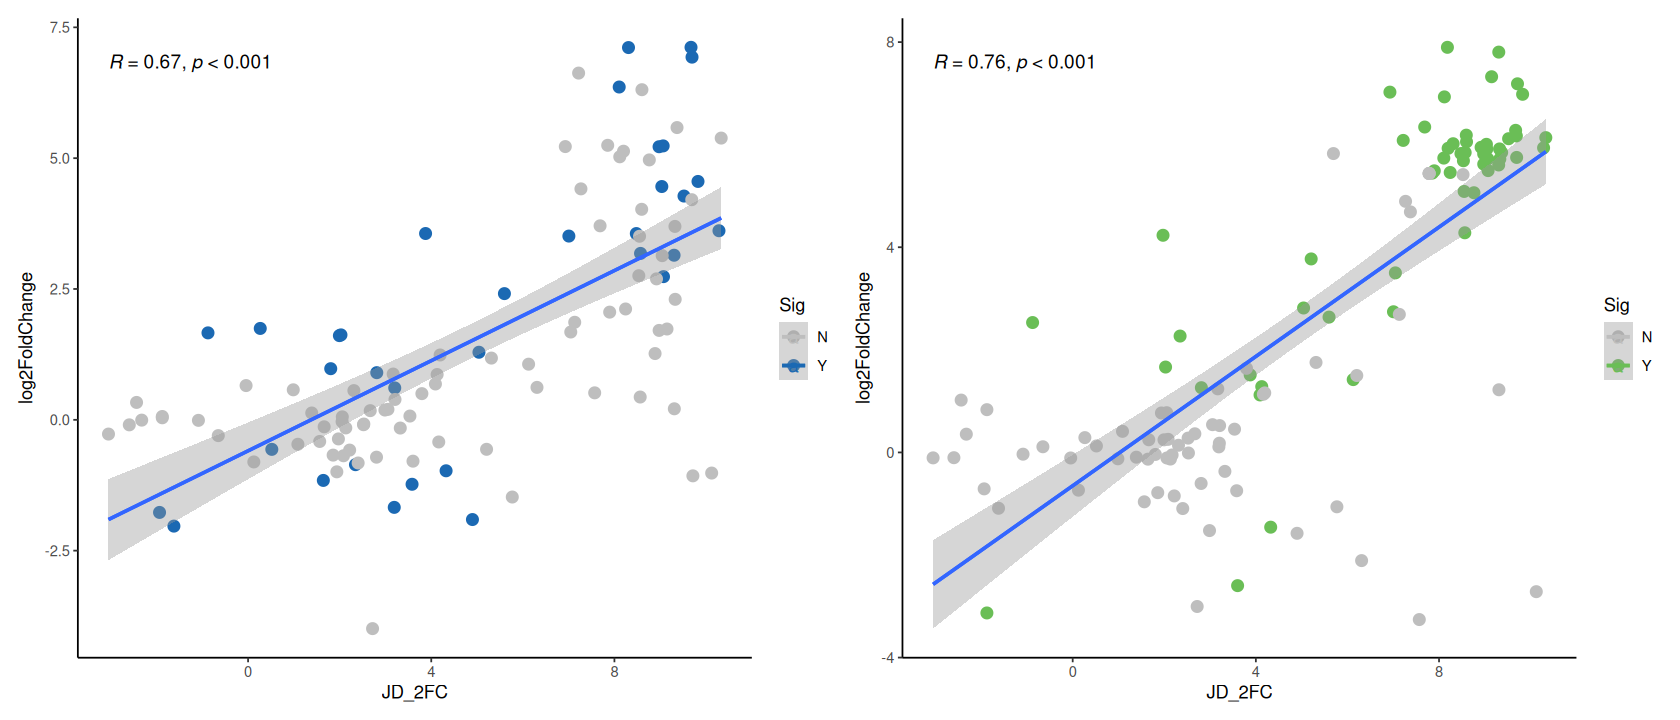

In [31]:
p3 <- ggplot(male_2C_E135, aes(x=JD_2FC, y =log2FoldChange, color = Sig, group = 1)) + geom_point(size = 3) + geom_smooth(method='lm', formula= y~x) + sm_statCorr(corr_method = "pearson") + theme_classic() + 
scale_color_manual(values = c("Y" = "#1B69B3", "N" = "gray"))
p4 <- ggplot(female_2C_E135, aes(x=JD_2FC, y =log2FoldChange, color = Sig, group = 1)) + geom_point(size = 3) + geom_smooth(method='lm', formula= y~x)+ sm_statCorr(corr_method = "pearson") + theme_classic() +
scale_color_manual(values = c("Y" = "#6ABE56", "N" = "gray"))
p3+p4
#
pdf(file = 'E135_2C_Reik_L2FC_JonReanalysis.pdf', height = 6, width = 14)
p3+p4
dev.off()

In [16]:
genes_2C <- c("Zscan4d", "Zscan4e", "Zscan4f", "Zscan4b", "Zscan4c", "Tcstv1", "Duxf3", "Zscan4-ps1", "Zscan4-ps2", "Zscan4-ps3")
E125_2C_Male <- filter(male_merge, external_gene_name %in% genes_2C)
E125_2C_Female <- filter(female_merge, external_gene_name %in% genes_2C)
#
E135_2C_Male <- filter(male_merge_E135, external_gene_name %in% genes_2C)
E135_2C_Female <- filter(female_merge_E135, external_gene_name %in% genes_2C)

In [17]:
E125_2C_Male <- E125_2C_Male[,c(2,9:15)]
E125_2C_Male <- column_to_rownames(E125_2C_Male, "external_gene_name")
E125_2C_Male <- as.matrix(E125_2C_Male)
head(E125_2C_Male)
E125_2C_Female <- E125_2C_Female[,c(2,9:16)]
E125_2C_Female <- column_to_rownames(E125_2C_Female, "external_gene_name")
E125_2C_Female <- as.matrix(E125_2C_Female)
head(E125_2C_Female)
E135_2C_Male <- E135_2C_Male[,c(2,9:15)]
E135_2C_Male <- column_to_rownames(E135_2C_Male, "external_gene_name")
E135_2C_Male <- as.matrix(E135_2C_Male)
head(E135_2C_Male)
E135_2C_Female <- E135_2C_Female[,c(2,9:14)]
E135_2C_Female <- column_to_rownames(E135_2C_Female, "external_gene_name")
E135_2C_Female <- as.matrix(E135_2C_Female)
head(E135_2C_Female)

,MCT1,MCT2,MCT3,MCT4,MKO1,MKO2,MKO4
Zscan4-ps2,5.815228,5.849690,5.760574,5.795834,8.206991,6.498110,7.835061
Tcstv1,6.440535,6.556567,6.426505,6.554063,9.726668,7.250985,10.145208
Zscan4e,6.292994,6.434395,6.355042,6.364386,9.711563,7.033617,9.188576
Zscan4c,5.777984,5.928662,5.925258,5.921840,9.261558,6.231823,8.957983
Zscan4f,5.643860,5.783101,5.681326,5.725532,8.051776,5.854248,7.547898
Zscan4b,5.807573,5.939823,5.842888,5.907753,8.435318,5.805069,8.509238


,FCT1,FCT2,FCT3,FCT4,FKO1,FKO2,FKO3,FKO4
Zscan4e,5.443405,5.571837,5.482400,5.398855,6.431640,9.513746,8.628024,7.892391
Zscan4b,5.445656,5.461489,5.428798,5.455451,5.961881,8.322067,7.614941,7.197198
Zscan4c,5.376340,5.274163,5.279135,5.300246,5.773753,8.822652,8.425435,7.399495
Zscan4f,5.604427,5.436991,5.506087,5.484185,6.111710,8.639326,7.916151,7.060180
Tcstv1,5.121582,5.109621,5.320490,5.438507,5.290911,8.962491,8.530722,7.538338
Zscan4-ps3,5.423121,5.371923,5.352012,5.318297,5.581161,7.960000,7.428314,6.537476


,MCTO1,MCTO2,MCTO3,MCKO1,MCKO3,MCKO4,MCKO5
Tcstv1,4.210584,4.218719,4.210334,4.490860,4.488336,4.580088,4.322254
Zscan4c,3.675882,3.677013,3.667843,4.136683,3.717617,3.739086,3.810558
Zscan4d,4.480279,4.484656,4.460024,4.930202,4.462834,4.727110,4.798450
Zscan4-ps1,3.441157,3.450820,3.456702,3.597666,3.443079,3.936668,3.441136
Zscan4e,3.708934,3.688088,3.707257,4.052245,3.681322,3.852132,3.783780
Zscan4-ps3,3.300106,3.327270,3.313685,3.583701,3.301430,3.467967,3.342377


,FCTO1,FCTO2,FCTO3,FCKO1,FCKO2,FCKO3
Tcstv1,7.194859,7.238573,7.307452,10.957427,10.637188,9.821230
Zscan4d,6.515808,6.550262,6.720100,9.921565,9.793074,8.944402
Zscan4-ps3,5.988111,6.061682,6.071957,7.696673,7.848083,7.498719
Zscan4e,6.187315,6.342455,6.118009,8.373709,8.995905,8.128928
Zscan4-ps1,6.177301,6.395919,6.235289,8.779266,8.468185,7.880895
Zscan4f,6.084745,6.047507,6.008674,8.782783,8.064817,7.534115


In [18]:
cols <- c(1,3)
#
annot_E125_M <- data.frame(Gene = rownames(E125_2C_Male))
annot_E125_M = left_join(annot_E125_M, male_merge[,c(2,8)], by = c("Gene" = "external_gene_name"))
annot_E125_M <- annot_E125_M %>% mutate(Sig = case_when((padj < 0.05 ~ "Y"), TRUE ~ "N"))
annot_E125_M <- annot_E125_M[,cols]
annot_E125_M <- column_to_rownames(annot_E125_M, "Gene")
#
annot_E125_F <- data.frame(Gene = rownames(E125_2C_Female))
annot_E125_F = left_join(annot_E125_F, female_merge[,c(2,8)], by = c("Gene" = "external_gene_name"))
annot_E125_F <- annot_E125_F %>% mutate(Sig = case_when((padj < 0.05 ~ "Y"), TRUE ~ "N"))
annot_E125_F <- annot_E125_F[,cols]
annot_E125_F <- column_to_rownames(annot_E125_F, "Gene")
#
annot_E135_M <- data.frame(Gene = rownames(E135_2C_Male))
annot_E135_M = left_join(annot_E135_M, male_merge_E135[,c(2,8)], by = c("Gene" = "external_gene_name"))
annot_E135_M <- annot_E135_M %>% mutate(Sig = case_when((padj < 0.05 ~ "Y"), TRUE ~ "N"))
annot_E135_M <- annot_E135_M[,cols]
annot_E135_M <- column_to_rownames(annot_E135_M, "Gene")
#
annot_E135_F <- data.frame(Gene = rownames(E135_2C_Female))
annot_E135_F = left_join(annot_E135_F, female_merge_E135[,c(2,8)], by = c("Gene" = "external_gene_name"))
annot_E135_F <- annot_E135_F %>% mutate(Sig = case_when((padj < 0.05 ~ "Y"), TRUE ~ "N"))
annot_E135_F <- annot_E135_F[,cols]
annot_E135_F <- column_to_rownames(annot_E135_F, "Gene")


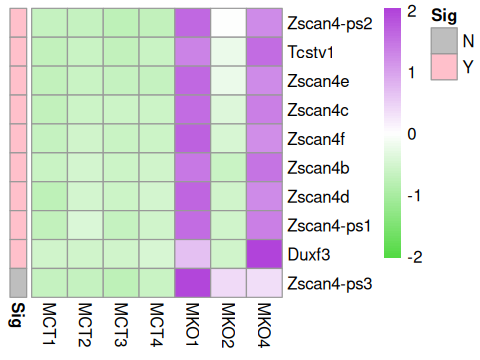

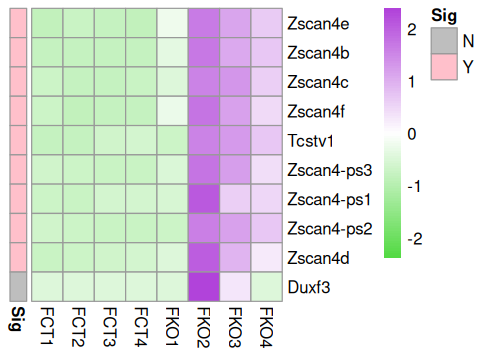

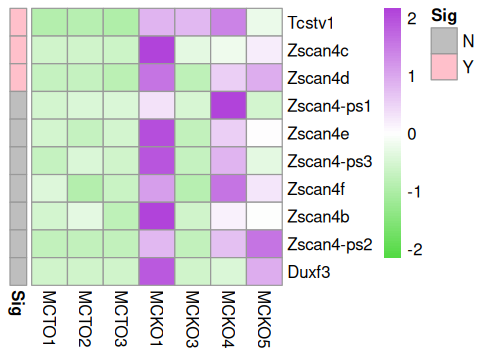

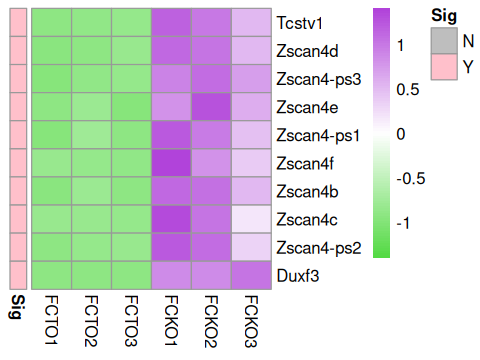

In [20]:
options(repr.plot.height = 3, repr.plot.width = 4)
ann_colors = list(Sig = c(N = "gray", Y = "pink"))
#
p5 <- pheatmap(E125_2C_Male, scale = "row", cluster_cols = F, cluster_rows = F,annotation_row = annot_E125_M, annotation_colors = ann_colors, color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))
p6 <- pheatmap(E125_2C_Female, scale = "row", cluster_cols = F, cluster_rows = F,annotation_row = annot_E125_F, annotation_colors = ann_colors, color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))
#
p7 <- pheatmap(E135_2C_Male, scale = "row", cluster_cols = F, cluster_rows = F,annotation_row = annot_E135_M, annotation_colors = ann_colors, color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))
p8 <- pheatmap(E135_2C_Female, scale = "row", cluster_cols = F, cluster_rows = F,annotation_row = annot_E135_F, annotation_colors = ann_colors, color = colorRampPalette(c("#53da43", "white", "#b143da"))(100))

In [21]:
options(repr.plot.height = 3, repr.plot.width = 4)
pdf(file = 'E125_2C_Male_heatmap.pdf', width = 4, height = 3)
p5
dev.off()
#
pdf(file = 'E125_2C_Female_heatmap.pdf', width = 4, height = 3)
p6
dev.off()
#
pdf(file = 'E135_2C_Male_heatmap.pdf', width = 4, height = 3)
p7
dev.off()
#
pdf(file = 'E135_2C_Female_heatmap.pdf', width = 4, height = 3)
p8
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

In [1]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 24.04.1 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.12.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37       IRdisplay_1.1       utf8_1.2.4         
 [4] base64enc_0.1-3     fastmap_1.2.0       glue_1.8.0         
 [7] htmltools_0.5.8.1   repr_1.1.7          lifecycle_